# Import libraries

In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib

# EDA

In [131]:
df = pd.read_csv("synthetic_driver_data.csv")
df

,driver_id,timestamp,day_of_week,hour_of_day,location_cluster,hours_worked,rides_completed,earnings,preferred_location,avg_ride_duration_minutes
0,driver_1,2025-04-24 16:20:07,3,16,Bandung,1.27,6,114000,Semarang,12.70
1,driver_1,2025-04-24 16:56:48,3,16,Jakarta,0.50,1,19000,Surabaya,30.00
2,driver_1,2025-04-24 20:24:32,3,20,Semarang,2.76,12,211000,Banten,13.80
3,driver_1,2025-04-24 23:50:05,3,23,Banten,2.02,7,111000,Banten,17.31
4,driver_1,2025-04-25 01:44:27,4,1,Jakarta,1.52,7,160000,Semarang,13.03
...,...,...,...,...,...,...,...,...,...,...
495,driver_9,2025-04-29 00:44:27,1,0,Semarang,1.29,2,55000,Banten,38.70
496,driver_9,2025-04-29 03:19:01,1,3,Banten,2.05,6,85000,Surabaya,20.50
497,driver_9,2025-04-29 04:03:08,1,4,Banten,0.59,2,26000,Banten,17.70
498,driver_9,2025-04-29 07:39:43,1,7,Jakarta,1.41,3,70000,Semarang,28.20


In [132]:
df.describe(include="all")

,driver_id,timestamp,day_of_week,hour_of_day,location_cluster,hours_worked,rides_completed,earnings,preferred_location,avg_ride_duration_minutes
count,500,500,500.000000,500.000000,500,500.000000,500.000000,500.000000,500,500.000000
unique,10,500,NaN,NaN,5,NaN,NaN,NaN,5,NaN
top,driver_1,2025-04-24 16:20:07,NaN,NaN,Jakarta,NaN,NaN,NaN,Jakarta,NaN
freq,50,1,NaN,NaN,107,NaN,NaN,NaN,109,NaN
mean,NaN,NaN,3.518000,11.482000,NaN,1.730160,4.864000,102178.000000,NaN,28.864100
std,NaN,NaN,2.193467,6.960933,NaN,0.798031,3.366329,81352.903487,NaN,19.484225
min,NaN,NaN,0.000000,0.000000,NaN,0.500000,1.000000,11000.000000,NaN,12.000000
25%,NaN,NaN,1.000000,5.000000,NaN,1.080000,2.000000,42750.000000,NaN,15.782500
50%,NaN,NaN,4.000000,11.000000,NaN,1.630000,4.000000,79000.000000,NaN,22.125000
75%,NaN,NaN,5.000000,17.250000,NaN,2.400000,7.000000,139000.000000,NaN,34.200000


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   driver_id                  500 non-null    object 
 1   timestamp                  500 non-null    object 
 2   day_of_week                500 non-null    int64  
 3   hour_of_day                500 non-null    int64  
 4   location_cluster           500 non-null    object 
 5   hours_worked               500 non-null    float64
 6   rides_completed            500 non-null    int64  
 7   earnings                   500 non-null    int64  
 8   preferred_location         500 non-null    object 
 9   avg_ride_duration_minutes  500 non-null    float64
dtypes: float64(2), int64(4), object(4)
memory usage: 39.2+ KB


In [134]:
df_ori = df.copy()

In [135]:
df["timestamp"] = pd.to_datetime(df["timestamp"], format='%Y-%m-%d %H:%M:%S')
df.set_index("timestamp", inplace=True)
df.sort_index(inplace=True)

In [136]:
df

,driver_id,day_of_week,hour_of_day,location_cluster,hours_worked,rides_completed,earnings,preferred_location,avg_ride_duration_minutes
timestamp,,,,,,,,,
2025-04-24 15:56:30,driver_9,3,15,Bandung,0.95,2,35000,Surabaya,28.50
2025-04-24 16:01:10,driver_10,3,16,Bandung,1.01,5,69000,Bandung,12.12
2025-04-24 16:20:07,driver_1,3,16,Bandung,1.27,6,114000,Semarang,12.70
2025-04-24 16:23:46,driver_3,3,16,Surabaya,1.32,5,59000,Surabaya,15.84
2025-04-24 16:25:27,driver_5,3,16,Jakarta,1.33,4,80000,Jakarta,19.95
...,...,...,...,...,...,...,...,...,...
2025-04-29 12:47:59,driver_6,1,12,Bandung,2.92,6,102000,Semarang,29.20
2025-04-29 14:55:01,driver_6,1,14,Semarang,1.69,7,145000,Semarang,14.49
2025-04-29 15:06:21,driver_5,1,15,Bandung,3.03,15,223000,Surabaya,12.12


In [137]:
df.drop(columns="driver_id", inplace=True)

In [138]:
features = df.drop(columns="earnings")
num_feat = features.select_dtypes(include=["number"]).columns
cat_feat = features.select_dtypes(exclude="number").columns

In [139]:
num_feat

Index(['day_of_week', 'hour_of_day', 'hours_worked', 'rides_completed',
       'avg_ride_duration_minutes'],
      dtype='object')

In [140]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[num_feat] = scaler.fit_transform(df[num_feat])

In [141]:
df

,day_of_week,hour_of_day,location_cluster,hours_worked,rides_completed,earnings,preferred_location,avg_ride_duration_minutes
timestamp,,,,,,,,
2025-04-24 15:56:30,0.500000,0.652174,Bandung,0.166667,0.066667,35000,Surabaya,0.157143
2025-04-24 16:01:10,0.500000,0.695652,Bandung,0.188889,0.266667,69000,Bandung,0.001143
2025-04-24 16:20:07,0.500000,0.695652,Bandung,0.285185,0.333333,114000,Semarang,0.006667
2025-04-24 16:23:46,0.500000,0.695652,Surabaya,0.303704,0.266667,59000,Surabaya,0.036571
2025-04-24 16:25:27,0.500000,0.695652,Jakarta,0.307407,0.200000,80000,Jakarta,0.075714
...,...,...,...,...,...,...,...,...
2025-04-29 12:47:59,0.166667,0.521739,Bandung,0.896296,0.333333,102000,Semarang,0.163810
2025-04-29 14:55:01,0.166667,0.608696,Semarang,0.440741,0.400000,145000,Semarang,0.023714
2025-04-29 15:06:21,0.166667,0.652174,Bandung,0.937037,0.933333,223000,Surabaya,0.001143


In [142]:
cat_feat

Index(['location_cluster', 'preferred_location'], dtype='object')

In [143]:
from sklearn.preprocessing import TargetEncoder

encoder = TargetEncoder()
# Loop through each categorical feature and encode it
for col in cat_feat:
    encoder = TargetEncoder()
    df[col] = encoder.fit_transform(df[[col]], df['earnings'])

c:\Users\Dama\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\Dama\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [144]:
df

,day_of_week,hour_of_day,location_cluster,hours_worked,rides_completed,earnings,preferred_location,avg_ride_duration_minutes
timestamp,,,,,,,,
2025-04-24 15:56:30,0.500000,0.652174,0.011989,0.166667,0.066667,35000,0.000000,0.157143
2025-04-24 16:01:10,0.500000,0.695652,0.011716,0.188889,0.266667,69000,0.013741,0.001143
2025-04-24 16:20:07,0.500000,0.695652,0.011164,0.285185,0.333333,114000,0.000000,0.006667
2025-04-24 16:23:46,0.500000,0.695652,0.000000,0.303704,0.266667,59000,0.000000,0.036571
2025-04-24 16:25:27,0.500000,0.695652,0.000000,0.307407,0.200000,80000,0.011083,0.075714
...,...,...,...,...,...,...,...,...
2025-04-29 12:47:59,0.166667,0.521739,0.011716,0.896296,0.333333,102000,0.000000,0.163810
2025-04-29 14:55:01,0.166667,0.608696,0.014506,0.440741,0.400000,145000,0.000000,0.023714
2025-04-29 15:06:21,0.166667,0.652174,0.011164,0.937037,0.933333,223000,0.000000,0.001143


In [145]:
df.asfreq("min", method="bfill")

,day_of_week,hour_of_day,location_cluster,hours_worked,rides_completed,earnings,preferred_location,avg_ride_duration_minutes
timestamp,,,,,,,,
2025-04-24 15:56:30,0.500000,0.652174,0.011989,0.166667,0.066667,35000,0.000000,0.157143
2025-04-24 15:57:30,0.500000,0.695652,0.011716,0.188889,0.266667,69000,0.013741,0.001143
2025-04-24 15:58:30,0.500000,0.695652,0.011716,0.188889,0.266667,69000,0.013741,0.001143
2025-04-24 15:59:30,0.500000,0.695652,0.011716,0.188889,0.266667,69000,0.013741,0.001143
2025-04-24 16:00:30,0.500000,0.695652,0.011716,0.188889,0.266667,69000,0.013741,0.001143
...,...,...,...,...,...,...,...,...
2025-04-29 19:18:30,0.166667,0.826087,0.011164,0.944444,0.533333,122000,0.000000,0.079333
2025-04-29 19:19:30,0.166667,0.826087,0.011164,0.944444,0.533333,122000,0.000000,0.079333
2025-04-29 19:20:30,0.166667,0.826087,0.011164,0.944444,0.533333,122000,0.000000,0.079333


In [146]:
# df['day_of_week'] = df.index.dayofweek
# df['month'] = df.index.month
# # Create lagged features manually
# for lag in range(1, 10):
#     df[f'lag_{lag}'] = df['earnings'].shift(lag)

In [147]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Assume df is indexed by timestamp
df = df.sort_index()

# Time-based features
df['month'] = df.index.month
df['day_of_week'] = df.index.dayofweek
df['hour_of_day'] = df.index.hour
df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

# Lagged features (longer window)
for lag in range(1, 15):  # lags 1–14
    df[f'lag_{lag}'] = df['earnings'].shift(lag)

# Rolling features
df['rolling_mean_7'] = df['earnings'].rolling(window=7).mean()
df['rolling_std_7'] = df['earnings'].rolling(window=7).std()
df['rolling_mean_14'] = df['earnings'].rolling(window=14).mean()

# Drop missing rows
df.dropna(inplace=True)

# Define features and target
X = df[['day_of_week', 'hour_of_day', 'is_weekend',
        'rolling_mean_7', 'rolling_std_7', 'rolling_mean_14'] + \
       [f'lag_{i}' for i in range(1, 15)]]
y = df['earnings']

# Train/test split (time-aware)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [156]:
X.columns

Index(['day_of_week', 'hour_of_day', 'is_weekend', 'rolling_mean_7',
       'rolling_std_7', 'rolling_mean_14', 'lag_1', 'lag_2', 'lag_3', 'lag_4',
       'lag_5', 'lag_6', 'lag_7', 'lag_8', 'lag_9', 'lag_10', 'lag_11',
       'lag_12', 'lag_13', 'lag_14'],
      dtype='object')

In [148]:
# Train model
model = XGBRegressor(n_estimators=750, learning_rate=0.3, max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Evaluate
preds = model.predict(X_test)
print("MAE:", mean_absolute_error(y_test, preds))
print("R² Score:", r2_score(y_test, preds))

MAE: 40559.49609375
R² Score: 0.5064728260040283


In [149]:
# from sklearn.metrics import mean_absolute_error, r2_score

# # Start with last row from training data
# history = X.iloc[-1].copy()
# forecast = []

# for _ in range(len(X_test)):
#     # Predict next day
#     pred = model.predict([history])[0]
    
#     # Save prediction
#     forecast.append(pred)
    
#     # Update history for next step
#     new_row = history.copy()
#     new_row['day_of_week'] = (new_row['day_of_week'] + 1) % 7
#     new_row['lag_1'] = pred
#     for i in range(2, 8):
#         new_row[f'lag_{i}'] = history[f'lag_{i-1}']
#     history = new_row

# # Turn forecast into Series
# forecast_series = pd.Series(forecast, index=X_test.index)

# # Evaluate again
# mae_wf = mean_absolute_error(y_test, forecast_series)
# r2_wf = r2_score(y_test, forecast_series)

# print(f"Walk-forward MAE: {mae_wf:.2f}")
# print(f"Walk-forward R²: {r2_wf:.4f}")

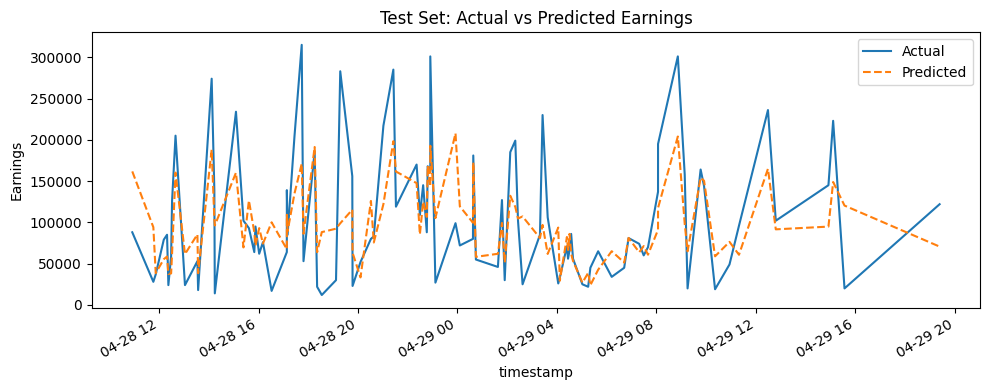

In [150]:
import matplotlib.pyplot as plt

# Convert test predictions into a Series with matching index
test_preds_series = pd.Series(preds, index=y_test.index)

plt.figure(figsize=(10, 4))
y_test.plot(label='Actual')
test_preds_series.plot(label='Predicted', linestyle='--')
plt.title("Test Set: Actual vs Predicted Earnings")
plt.ylabel("Earnings")
plt.legend()
plt.tight_layout()
plt.show()

In [151]:
joblib.dump(model, 'earnings_model.pkl')

['earnings_model.pkl']

In [152]:
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_absolute_error, r2_score
# import joblib

# # Feature selection
# X = df.drop(columns="earnings")
# y = df['earnings']

# # Train-test split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Train model
# model = RandomForestRegressor(n_estimators=50, random_state=42)
# model.fit(X_train, y_train)

# # Evaluate
# preds = model.predict(X_test)
# print("MAE:", mean_absolute_error(y_test, preds))
# print("R² Score:", r2_score(y_test, preds))

# # Save model
# # joblib.dump(model, 'earnings_model.pkl')

In [153]:
# from sklearn.model_selection import train_test_split, cross_val_score
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_absolute_error, r2_score
# from sklearn.preprocessing import StandardScaler
# from sklearn.pipeline import Pipeline
# import joblib

# # --- Feature Selection ---
# X = df.drop(columns="earnings")
# y = df['earnings']

# # --- Train/Test Split ---
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # --- Define Pipelines with CV ---
# models = {
#     "Random Forest": Pipeline([
#         ('scaler', StandardScaler()),
#         ('reg', RandomForestRegressor(n_estimators=50, random_state=42))
#     ]),
#     "Gradient Boosting": Pipeline([
#         ('scaler', StandardScaler()),
#         ('reg', GradientBoostingRegressor(n_estimators=50, random_state=42))
#     ]),
#     "Linear Regression": Pipeline([
#         ('scaler', StandardScaler()),
#         ('reg', LinearRegression())
#     ])
# }

# results = {}

# print("Training and Evaluating Models...\n")

# for name, pipeline in models.items():
#     # Cross-validation
#     mae_scores = -cross_val_score(pipeline, X_train, y_train,
#                                   scoring='neg_mean_absolute_error', cv=5)
#     r2_scores = cross_val_score(pipeline, X_train, y_train,
#                                 scoring='r2', cv=5)

#     print(f"{name} - Avg MAE (CV): {mae_scores.mean():.2f}")
#     print(f"{name} - Avg R² (CV): {r2_scores.mean():.2f}\n")

#     # Fit on full train set and evaluate on test
#     pipeline.fit(X_train, y_train)
#     preds = pipeline.predict(X_test)
#     test_mae = mean_absolute_error(y_test, preds)
#     test_r2 = r2_score(y_test, preds)

#     results[name] = {
#         'pipeline': pipeline,
#         'cv_mae': mae_scores.mean(),
#         'cv_r2': r2_scores.mean(),
#         'test_mae': test_mae,
#         'test_r2': test_r2
#     }